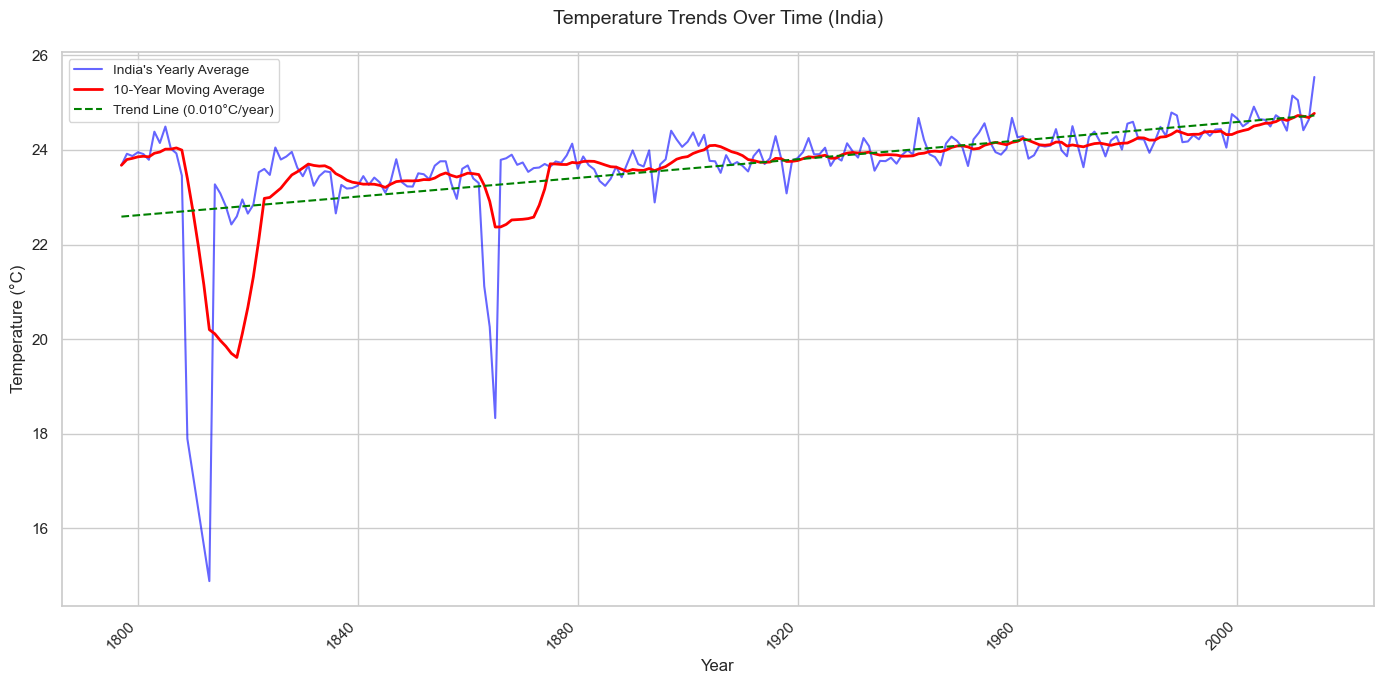

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Load dataset
file_path = "GlobalLandTemperaturesByCountry.csv"
data = pd.read_csv(file_path)

# Convert 'dt' to datetime and set index
data['dt'] = pd.to_datetime(data['dt'])
data = data.set_index('dt')

# Filter for a specific country (e.g., India)
country = "India"
country_data = data[data['Country'] == country].copy()  # Avoid SettingWithCopyWarning

# Check if country data is empty
if country_data.empty:
    raise ValueError(f"No data found for country: {country}")

# Handle missing values with time-based interpolation
temperature_data = country_data['AverageTemperature'].interpolate(method='time')

# Resample yearly for better visualization
yearly_avg_temp = temperature_data.resample('Y').mean()

# Remove years with NaN values after resampling (if any)
yearly_avg_temp = yearly_avg_temp.dropna()

# Check if there's enough data for analysis
if len(yearly_avg_temp) < 10:
    raise ValueError("Insufficient data for 10-year moving average.")

# Compute Moving Average (10-year)
rolling_avg = yearly_avg_temp.rolling(window=10, min_periods=1).mean()  # Smoother start

# Fit a Linear Regression Trend Line
years_since_start = np.arange(len(yearly_avg_temp))  # X as 0-based index
slope, intercept, _, _, _ = linregress(years_since_start, yearly_avg_temp.values)
trend_line = intercept + slope * years_since_start

# Calculate slope in °C per year for annotation
slope_per_decade = slope * 10  # Convert slope to °C per decade

# Plot Temperature Trends
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_temp, label=f"{country}'s Yearly Average", color='blue', alpha=0.6)
plt.plot(rolling_avg, label="10-Year Moving Average", color='red', linewidth=2)
plt.plot(yearly_avg_temp.index, trend_line, '--', color='green', 
         label=f"Trend Line ({slope:.3f}°C/year)")

# Customize plot
plt.title(f"Temperature Trends Over Time ({country})", fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.legend(fontsize=10)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Save the plot
plt.tight_layout()
plt.savefig(f"temperature_trends_{country}.png", dpi=300)
plt.show()

In [1]:
# # import pandas as pd
# # import matplotlib.pyplot as plt

# # file_path = "GlobalLandTemperaturesByCountry.csv"  
# # data = pd.read_csv(file_path)


# # print(data.head())

# # # Convert the 'dt' column to datetime format and set it as the index
# # data['dt'] = pd.to_datetime(data['dt'])
# # data = data.set_index('dt')

# # # Extract the temperature column
# # temperature_data = data['AverageTemperature'].fillna(method='ffill')

# # # Plot the data
# # plt.figure(figsize=(12, 6))
# # plt.plot(temperature_data, label="Temperature Data")
# # plt.title("Temperature Trends Over Time")
# # plt.xlabel("Year")
# # plt.ylabel("Temperature (°C)")
# # plt.legend()
# # plt.show()


# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import linregress

# # Load dataset
# file_path = "GlobalLandTemperaturesByCountry.csv"
# data = pd.read_csv(file_path)

# # Convert 'dt' to datetime and set index
# data['dt'] = pd.to_datetime(data['dt'])
# data = data.set_index('dt')

# # Filter for a specific country (e.g., India)
# country = "India"  # Change this as needed
# country_data = data[data['Country'] == country]

# # Handle missing values
# temperature_data = country_data['AverageTemperature'].interpolate()

# # Resample yearly for better visualization
# yearly_avg_temp = temperature_data.resample('Y').mean()

# # Compute Moving Average (10-year)
# rolling_avg = yearly_avg_temp.rolling(window=10).mean()

# # # Fit a Linear Regression Trend Line
# x = np.arange(len(yearly_avg_temp))
# y = yearly_avg_temp.values
# slope, intercept, _, _, _ = linregress(x, y)
# trend_line = intercept + slope * x

# # Plot Temperature Trends
# plt.figure(figsize=(12, 6))
# plt.plot(yearly_avg_temp, label=f"{country}'s Yearly Average Temperature", color='b', alpha=0.6)
# plt.plot(yearly_avg_temp.index, rolling_avg, label="10-Year Moving Average", color='r', linewidth=2)
# plt.plot(yearly_avg_temp.index, trend_line, '--', color='g', label="Trend Line")

# # Labels and Customization
# plt.title(f"Temperature Trends Over Time ({country})")
# plt.xlabel("Year")
# plt.ylabel("Temperature (°C)")
# plt.legend()
# plt.grid(True)
# plt.show()


# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import linregress

# # Load dataset
# file_path = "GlobalLandTemperaturesByCountry.csv"
# data = pd.read_csv(file_path)

# # Convert 'dt' to datetime and set index
# data['dt'] = pd.to_datetime(data['dt'])
# data = data.set_index('dt')

# # Filter for a specific country (e.g., India)
# country = "India"
# country_data = data[data['Country'] == country]

# # Handle missing values: Remove extreme outliers
# q_low, q_high = country_data["AverageTemperature"].quantile([0.01, 0.99])
# country_data = country_data[(country_data["AverageTemperature"] > q_low) & 
#                             (country_data["AverageTemperature"] < q_high)]

# # Fill missing values before interpolation
# country_data["AverageTemperature"] = country_data["AverageTemperature"].fillna(method='ffill').fillna(method='bfill').interpolate()

# # Resample yearly for better visualization
# yearly_avg_temp = country_data["AverageTemperature"].resample('Y').mean()

# # Compute Moving Average (10-year)
# rolling_avg = yearly_avg_temp.rolling(window=10).mean()

# # Convert Year to Numeric Format for Regression
# years_numeric = yearly_avg_temp.index.year
# x = years_numeric - years_numeric.min()  # Normalize years
# y = yearly_avg_temp.values

# # Linear Regression for Trend Line
# slope, intercept, _, _, _ = linregress(x, y)
# trend_line = intercept + slope * (years_numeric - years_numeric.min())

# # Polynomial Regression (Degree 2) for Better Fit
# poly_coeffs = np.polyfit(x, y, 2)
# poly_trend = np.polyval(poly_coeffs, (years_numeric - years_numeric.min()))

# # Plot Temperature Trends
# plt.figure(figsize=(12, 6))
# plt.plot(yearly_avg_temp, label=f"{country}'s Yearly Avg. Temp", color='b', alpha=0.6)
# plt.plot(yearly_avg_temp.index, rolling_avg, label="10-Year Moving Avg.", color='r', linewidth=2)
# # Convert years_numeric to a datetime index for proper alignment
# trend_index = pd.to_datetime(years_numeric.astype(str) + "-01-01")

# # Plot the corrected trend lines
# plt.plot(trend_index, trend_line, '--', color='g', linewidth=2.5, label="Linear Trend")
# plt.plot(trend_index, poly_trend, '-.', color='purple', linewidth=2, label="Polynomial Trend")


# # Labels & Customization
# plt.title(f"Temperature Trends Over Time ({country})", fontsize=14, fontweight='bold')
# plt.xlabel("Year", fontsize=12)
# plt.ylabel("Temperature (°C)", fontsize=12)
# plt.legend(fontsize=10)
# plt.grid(True, linestyle='--', alpha=0.6)

# # Highlight Recent 50 Years with a Zoomed Inset Plot
# ax_inset = plt.axes([0.6, 0.2, 0.3, 0.3])  # Position of the inset plot
# recent_years = yearly_avg_temp.index.year >= 1970
# ax_inset.plot(yearly_avg_temp.index[recent_years], yearly_avg_temp[recent_years], 'b', alpha=0.6)
# ax_inset.plot(yearly_avg_temp.index[recent_years], rolling_avg[recent_years], 'r', linewidth=2)
# ax_inset.plot(yearly_avg_temp.index[recent_years], poly_trend[recent_years], '-.', color='purple', linewidth=2)
# ax_inset.set_title("Last 50 Years", fontsize=10)
# ax_inset.grid(True, linestyle='--', alpha=0.5)

# plt.show()











# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# from scipy.stats import linregress

# # Set Seaborn style for better aesthetics
# sns.set(style="whitegrid")

# # Load dataset
# file_path = "GlobalLandTemperaturesByCountry.csv"
# data = pd.read_csv(file_path)

# # Convert 'dt' to datetime and set index
# data['dt'] = pd.to_datetime(data['dt'])
# data = data.set_index('dt')

# # Filter for a specific country (e.g., India)
# country = "India"
# country_data = data[data['Country'] == country].copy()  # Avoid SettingWithCopyWarning

# # Check if country data is empty
# if country_data.empty:
#     raise ValueError(f"No data found for country: {country}")

# # Handle missing values with time-based interpolation
# temperature_data = country_data['AverageTemperature'].interpolate(method='time')

# # Resample yearly for better visualization
# yearly_avg_temp = temperature_data.resample('Y').mean()

# # Remove years with NaN values after resampling (if any)
# yearly_avg_temp = yearly_avg_temp.dropna()

# # Check if there's enough data for analysis
# if len(yearly_avg_temp) < 10:
#     raise ValueError("Insufficient data for 10-year moving average.")

# # Compute Moving Average (10-year)
# rolling_avg = yearly_avg_temp.rolling(window=10, min_periods=1).mean()  # Smoother start

# # Fit a Linear Regression Trend Line
# years_since_start = np.arange(len(yearly_avg_temp))  # X as 0-based index
# slope, intercept, _, _, _ = linregress(years_since_start, yearly_avg_temp.values)
# trend_line = intercept + slope * years_since_start

# # Calculate slope in °C per year for annotation
# slope_per_decade = slope * 10  # Convert slope to °C per decade

# # Plot Temperature Trends
# plt.figure(figsize=(14, 7))
# plt.plot(yearly_avg_temp, label=f"{country}'s Yearly Average", color='blue', alpha=0.6)
# plt.plot(rolling_avg, label="10-Year Moving Average", color='red', linewidth=2)
# plt.plot(yearly_avg_temp.index, trend_line, '--', color='green', 
#          label=f"Trend Line ({slope:.3f}°C/year)")

# # Customize plot
# plt.title(f"Temperature Trends Over Time ({country})", fontsize=14, pad=20)
# plt.xlabel("Year", fontsize=12)
# plt.ylabel("Temperature (°C)", fontsize=12)
# plt.legend(fontsize=10)

# # Rotate x-axis labels for readability
# plt.xticks(rotation=45, ha='right')

# # Save the plot
# plt.tight_layout()
# plt.savefig(f"temperature_trends_{country}.png", dpi=300)
# plt.show()

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
# Resample to monthly frequency (instead of yearly)
monthly_avg_temp = temperature_data.resample('M').mean()

# Decompose with period=12 (for monthly data)
# Check variance: if it increases with time, use multiplicative model
if monthly_avg_temp.var() > 1.5 * monthly_avg_temp.iloc[:60].var():
    model_type = 'multiplicative'
else:
    model_type = 'additive'

decomposition = seasonal_decompose(monthly_avg_temp, model=model_type, period=12)

# Plot the decomposition
plt.rcParams.update({'figure.figsize': (12, 8)})
decomposition.plot()
plt.suptitle('Seasonal Decomposition (Monthly Data)', y=1.02)
plt.tight_layout()
plt.show()


NameError: name 'temperature_data' is not defined

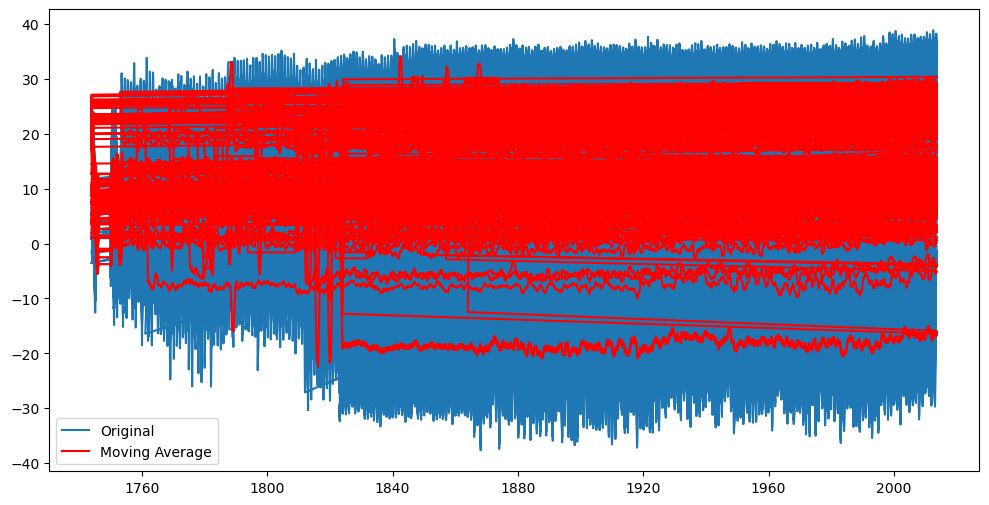

C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is avai

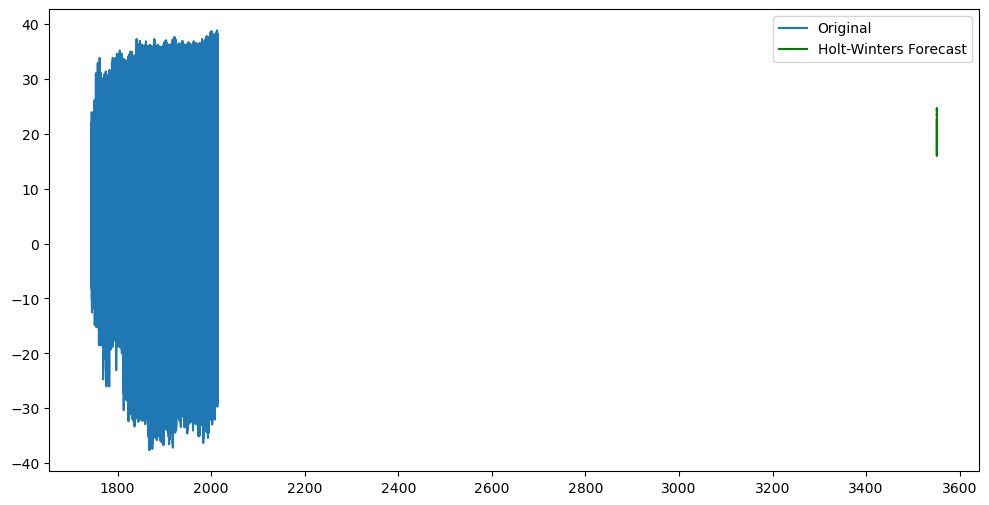

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Moving Average
temperature_data_ma = temperature_data.rolling(window=12).mean()

# Plot Moving Average
plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label="Original")
plt.plot(temperature_data_ma, label="Moving Average", color='red')
plt.legend()
plt.show()

# Apply Holt-Winters Exponential Smoothing
model_hw = ExponentialSmoothing(temperature_data, trend="additive", seasonal="additive", seasonal_periods=12)
hw_fit = model_hw.fit()
hw_forecast = hw_fit.forecast(steps=12)

# Plot Exponential Smoothing
plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label="Original")
plt.plot(hw_forecast, label="Holt-Winters Forecast", color='green')
plt.legend()
plt.show()


C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\

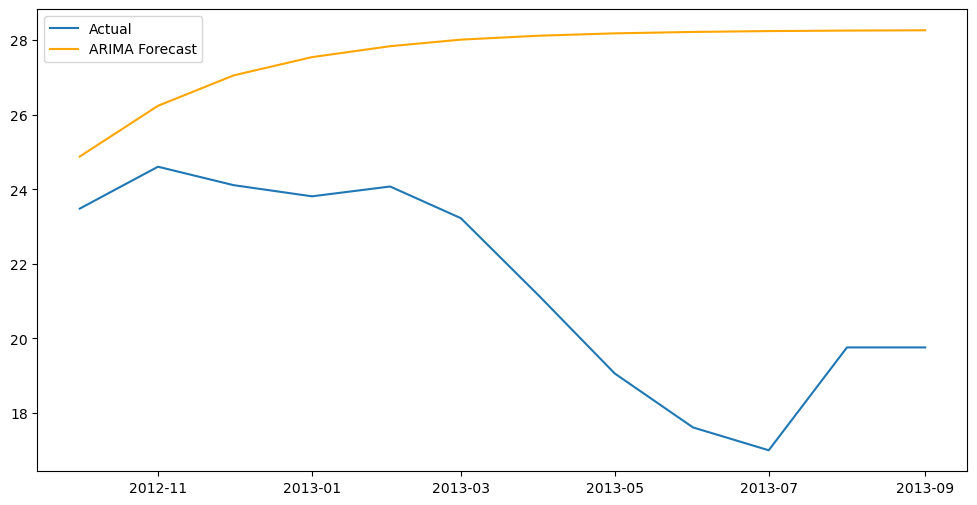

Mean Squared Error (ARIMA): 48.32


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_data = temperature_data[:-12]
test_data = temperature_data[-12:]

# Fit ARIMA model
model_arima = ARIMA(train_data, order=(1, 1, 1))
arima_fit = model_arima.fit()
arima_forecast = arima_fit.forecast(steps=12)

# Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(test_data, label="Actual")
plt.plot(test_data.index, arima_forecast, label="ARIMA Forecast", color='orange')
plt.legend()
plt.show()

# Evaluate Model Performance
mse = mean_squared_error(test_data, arima_forecast)
print(f"Mean Squared Error (ARIMA): {mse:.2f}")


           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland


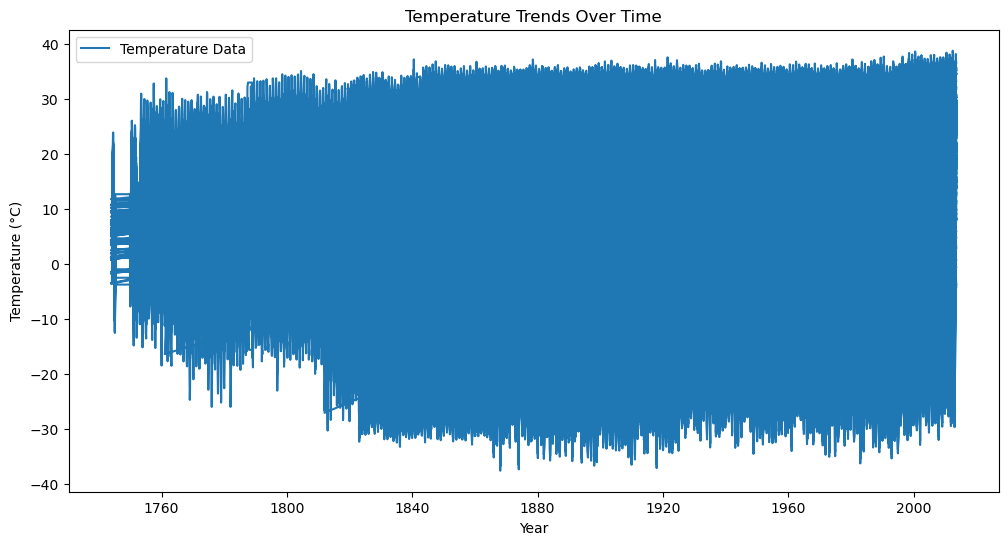

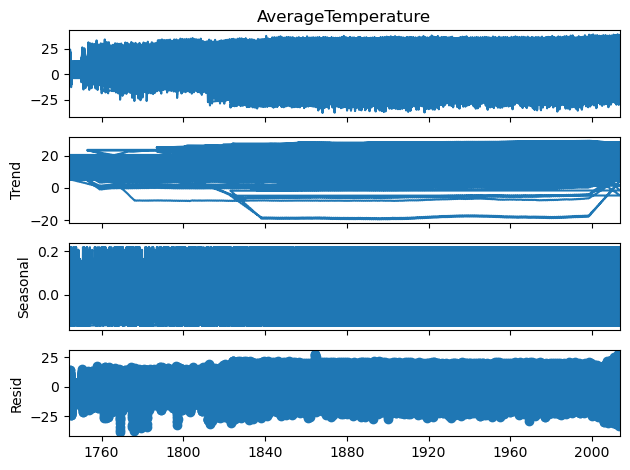

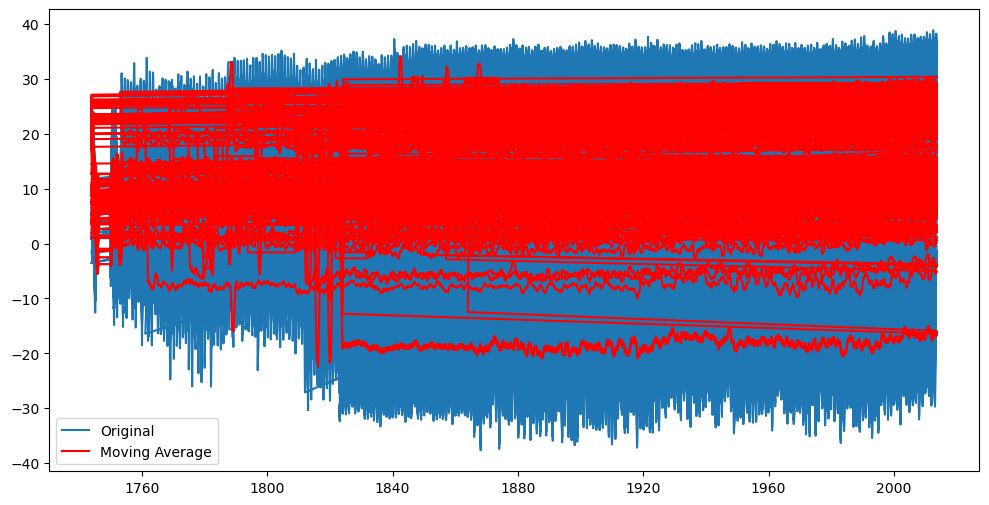

C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is avai

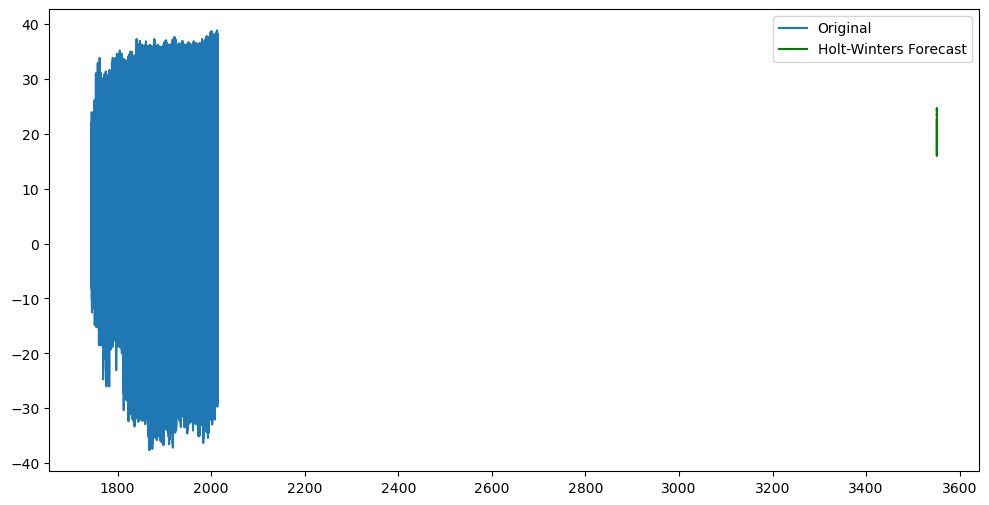

C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ritika\anaconda3\Lib\

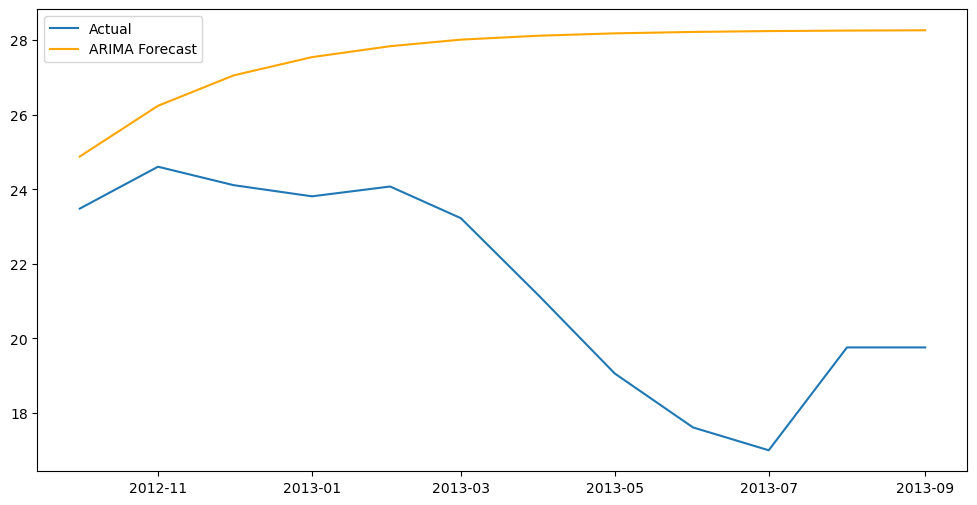

Mean Squared Error (ARIMA): 48.32
This project demonstrated the analysis and forecasting of temperature data using time series models.


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

file_path = "GlobalLandTemperaturesByCountry.csv"  
data = pd.read_csv(file_path)


print(data.head())

# Convert the 'dt' column to datetime format and set it as the index
data['dt'] = pd.to_datetime(data['dt'])
data = data.set_index('dt')

# Extract the temperature column
temperature_data = data['AverageTemperature'].fillna(method='ffill')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label="Temperature Data")
plt.title("Temperature Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Step 3: Decompose the time series
decomposition = seasonal_decompose(temperature_data, model='additive', period=365)
decomposition.plot()
plt.show()

# Step 4: Apply Moving Average and Exponential Smoothing
temperature_data_ma = temperature_data.rolling(window=12).mean()
plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label="Original")
plt.plot(temperature_data_ma, label="Moving Average", color='red')
plt.legend()
plt.show()

# Apply Holt-Winters Exponential Smoothing
model_hw = ExponentialSmoothing(temperature_data, trend="additive", seasonal="additive", seasonal_periods=12)
hw_fit = model_hw.fit()
hw_forecast = hw_fit.forecast(steps=12)

plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label="Original")
plt.plot(hw_forecast, label="Holt-Winters Forecast", color='green')
plt.legend()
plt.show()

# Step 5: Fit ARIMA model
train_data = temperature_data[:-12]
test_data = temperature_data[-12:]

model_arima = ARIMA(train_data, order=(1, 1, 1))
arima_fit = model_arima.fit()
arima_forecast = arima_fit.forecast(steps=12)

# Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(test_data, label="Actual")
plt.plot(test_data.index, arima_forecast, label="ARIMA Forecast", color='orange')
plt.legend()
plt.show()

# Step 6: Evaluate Model Performance
mse = mean_squared_error(test_data, arima_forecast)
print(f"Mean Squared Error (ARIMA): {mse:.2f}")

# Conclusion
print("This project demonstrated the analysis and forecasting of temperature data using time series models.")
